**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

(-0.5, 401.5, 587.5, -0.5)

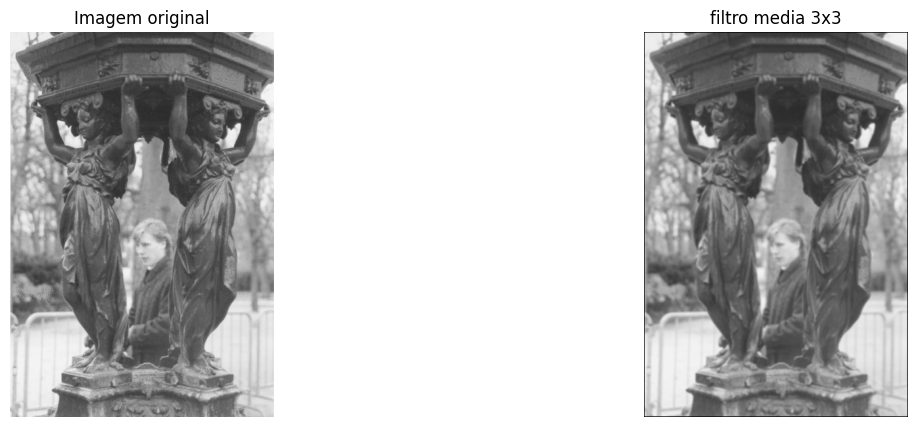

In [30]:
# code here
# máscara 3x3
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
altura, largura = img1.shape

newImg = np.zeros((altura, largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img1[i-1:i+2, j-1:j+2]
        media = np.mean(masc)
        newImg[i, j] = int(media)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1).set_title("Imagem original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2).set_title("filtro media 3x3")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 401.5, 587.5, -0.5)

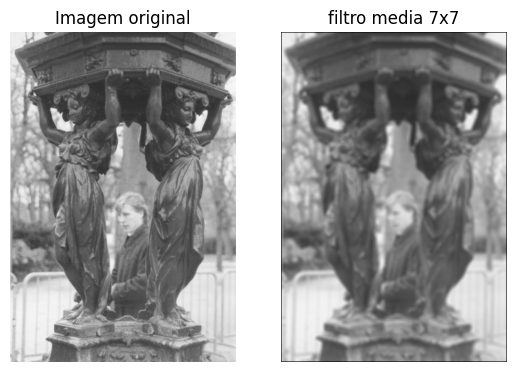

In [1]:
 
# máscara 7x7
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
altura, largura = img1.shape

newImg = np.zeros((altura, largura))

for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img1[i-1:i+6, j-1:j+6]
        media = np.mean(masc)
        newImg[i, j] = int(media)

plt.subplot(1, 2, 1).set_title("Imagem original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2).set_title("filtro media 7x7")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 401.5, 587.5, -0.5)

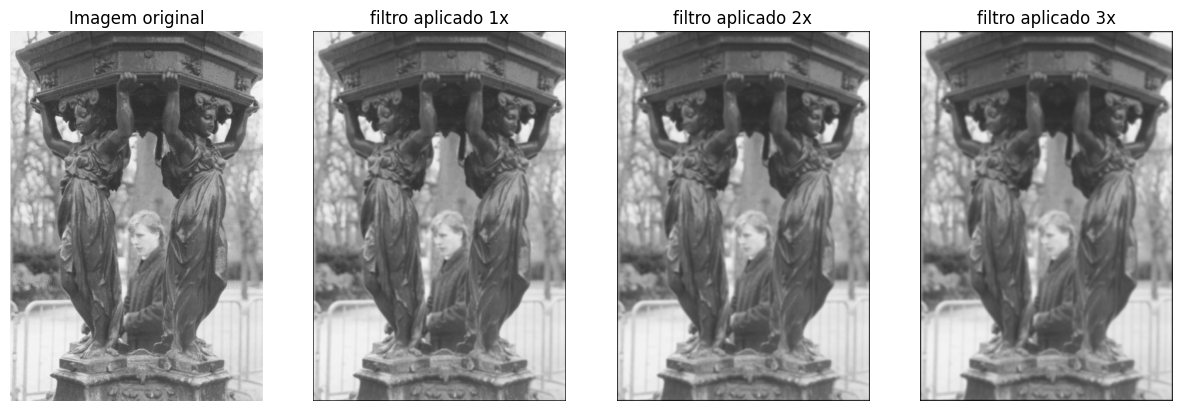

In [2]:

#3x3 aplicado 3 vezes sequencias
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
altura, largura = img1.shape

newImg1 = np.zeros((altura, largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img1[i-1:i+2, j-1:j+2]
        media = np.mean(masc)
        newImg1[i, j] = int(media)

newImg2 = np.zeros((altura, largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = newImg1[i-1:i+2, j-1:j+2]
        media = np.mean(masc)
        newImg2[i, j] = int(media)

newImg3 = np.zeros((altura, largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = newImg2[i-1:i+2, j-1:j+2]
        media = np.mean(masc)
        newImg3[i, j] = int(media)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1).set_title("Imagem original")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 2).set_title("filtro aplicado 1x")
plt.imshow(newImg1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 3).set_title("filtro aplicado 2x")
plt.imshow(newImg2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 4).set_title("filtro aplicado 3x")
plt.imshow(newImg3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

(-0.5, 199.5, 302.5, -0.5)

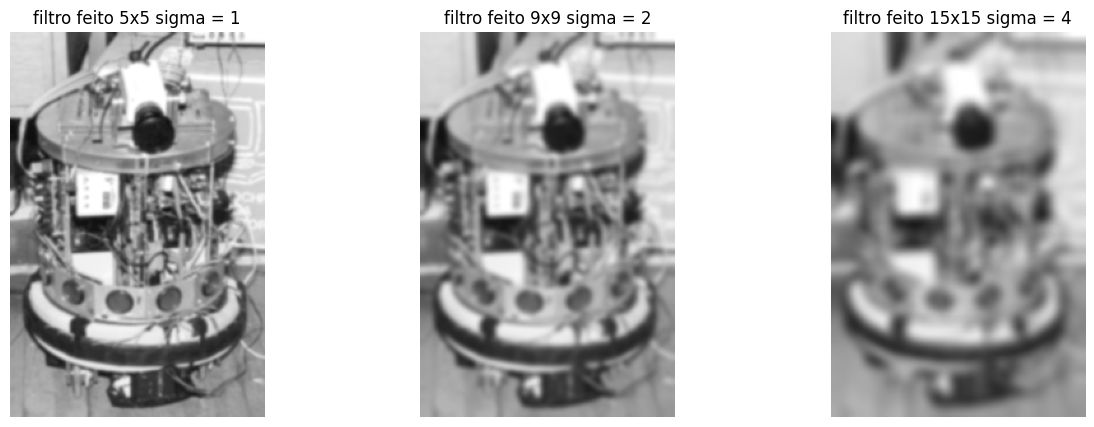

In [1]:
#  code here
#para sigma = 1
import cv2
import matplotlib.pyplot as plt
import numpy as np
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

altura, largura = img2.shape
newImg = np.zeros((altura, largura))

def gaussiana(i, j, sigma):
    return (1.0 / (2 * np.pi * (sigma ** 2))) * np.exp(-((i ** 2 + j ** 2) / (2 * sigma ** 2)))

def gerarMascara(tam, sigma):
    mask = np.zeros((tam, tam))
    center = np.around(tam / 2)
    for i in range(tam):
        for j in range(tam):
            mask[i, j] = gaussiana(i - center, j - center, sigma)
    return mask / np.sum(mask)

blurImg1 = cv2.GaussianBlur(img2, (5, 5), 1)
newImg1 = np.zeros((altura, largura))
mask1 = gerarMascara(5, 1)
newImg1 = cv2.filter2D(img2, -1, mask1)


newImg2 = np.zeros((altura, largura))
mask2 = gerarMascara(9, 2)
newImg2 = cv2.filter2D(img2, -1, mask2)
blurImg2 = cv2.GaussianBlur(img2, (9,9), 2)


blurImg3 = cv2.GaussianBlur(img2, (15, 15), 4)
newImg3 = np.zeros((altura, largura))
mask3 = gerarMascara(15, 4)
newImg3 = cv2.filter2D(img2, -1, mask3)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1).set_title("filtro feito 5x5 sigma = 1")
plt.imshow(newImg1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2).set_title("filtro feito 9x9 sigma = 2")
plt.imshow(newImg2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3).set_title("filtro feito 15x15 sigma = 4")
plt.imshow(newImg3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

(-0.5, 401.5, 587.5, -0.5)

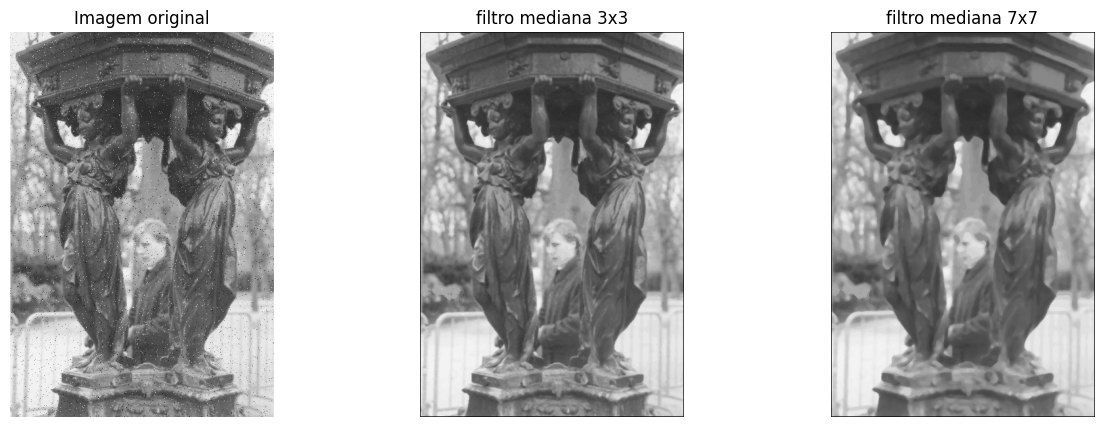

In [44]:
#  code here
import numpy as np
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

altura, largura = img3.shape

newImg = np.zeros((altura , largura))


for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img3[i-1:i+2, j-1:j+2]
        media = np.median(masc)
        newImg[i, j] = int(media)

newImg2 = np.zeros((altura , largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img3[i-1:i+5, j-1:j+5]
        media = np.median(masc)
        newImg2[i, j] = int(media)
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1).set_title("Imagem original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2).set_title("filtro mediana 3x3")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3).set_title("filtro mediana 7x7")
plt.imshow(newImg2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

(-0.5, 401.5, 587.5, -0.5)

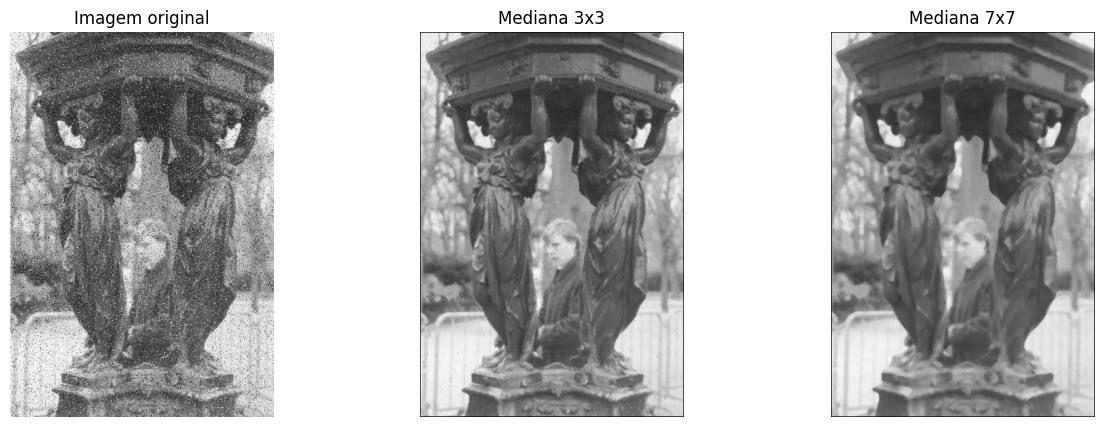

In [45]:
#  code here
import matplotlib.pyplot as plt
import cv2
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img3[i-1:i+2, j-1:j+2]
        media = np.median(masc)
        newImg[i, j] = int(media)

newImg2 = np.zeros((altura , largura))
for i in range(1, altura - 1):
    for j in range(1, largura - 1):
        masc = img3[i-1:i+5, j-1:j+5]
        media = np.median(masc)
        newImg2[i, j] = int(media)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1).set_title("Imagem original")
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2).set_title("Mediana 3x3")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3).set_title("Mediana 7x7")
plt.imshow(newImg2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')